## Feature Importance and Feature Selection with mixed LJ data


In [75]:
import opensmile 
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import svm
base_path = "/home/ubuntu/"

## Sampling and Mixing Data

In [4]:
real_path = base_path + 'data/wavefake_data/LJSpeech_1.1/wavs'
real_path_lst = os.listdir(real_path) 
real_path_lst = [l for l in real_path_lst if ".wav" in l]
number_files = len(real_path_lst)
print(len(real_path_lst))

13100


In [5]:
real_files = random.sample(real_path_lst, 700)
len(real_files)

700

In [6]:
ljs_fbm_path = base_path + 'data/wavefake_data/generated_audio/ljspeech_full_band_melgan'
ljs_fbm_lst = os.listdir(ljs_fbm_path) 
ljs_fbm_lst = [l for l in ljs_fbm_lst if ".wav" in l]
number_files = len(ljs_fbm_lst)
print(len(ljs_fbm_lst))

13100


In [7]:
fake_files = []

In [8]:
files = [f.split(".")[0] for f in real_files[:100]]
fake_files.extend([os.path.join(ljs_fbm_path,f2) for f in files for f2 in ljs_fbm_lst if f in f2])

In [9]:
len(fake_files), fake_files[0]

(100,
 '/home/ubuntu/data/wavefake_data/generated_audio/ljspeech_full_band_melgan/LJ038-0086_gen.wav')

In [10]:
ljs_mg_path = base_path + 'data/wavefake_data/generated_audio/ljspeech_melgan'
ljs_mg_lst = os.listdir(ljs_mg_path) 
ljs_mg_lst = [l for l in ljs_mg_lst if ".wav" in l]
number_files = len(ljs_mg_lst)
print(len(ljs_mg_lst))

13100


In [11]:
files = [f.split(".")[0] for f in real_files[100:200]]
fake_files.extend([os.path.join(ljs_mg_path,f2) for f in files for f2 in ljs_mg_lst if f in f2])

In [12]:
len(fake_files), fake_files[100]

(200,
 '/home/ubuntu/data/wavefake_data/generated_audio/ljspeech_melgan/LJ032-0226_gen.wav')

In [13]:
ljs_mgl_path = base_path + 'data/wavefake_data/generated_audio/ljspeech_melgan_large'
ljs_mgl_lst = os.listdir(ljs_mgl_path) 
ljs_mgl_lst = [l for l in ljs_mgl_lst if ".wav" in l]
number_files = len(ljs_mgl_lst)
print(len(ljs_mgl_lst))

13100


In [14]:
files = [f.split(".")[0] for f in real_files[200:300]]
fake_files.extend([os.path.join(ljs_mgl_path,f2) for f in files for f2 in ljs_mgl_lst if f in f2])

In [15]:
len(fake_files), fake_files[200]

(300,
 '/home/ubuntu/data/wavefake_data/generated_audio/ljspeech_melgan_large/LJ011-0110_gen.wav')

In [16]:
ljs_mbmg_path = base_path + 'data/wavefake_data/generated_audio/ljspeech_multi_band_melgan'
ljs_mbmg_lst = os.listdir(ljs_mbmg_path) 
ljs_mbmg_lst = [l for l in ljs_mbmg_lst if ".wav" in l]
number_files = len(ljs_mbmg_lst)
print(len(ljs_mbmg_lst))

13100


In [17]:
files = [f.split(".")[0] for f in real_files[300:400]]
fake_files.extend([os.path.join(ljs_mbmg_path,f2) for f in files for f2 in ljs_mbmg_lst if f in f2])

In [18]:
len(fake_files), fake_files[300]

(400,
 '/home/ubuntu/data/wavefake_data/generated_audio/ljspeech_multi_band_melgan/LJ048-0157_gen.wav')

In [19]:
ljs_pwg_path = base_path + 'data/wavefake_data/generated_audio/ljspeech_parallel_wavegan'
ljs_pwg_lst = os.listdir(ljs_pwg_path) 
ljs_pwg_lst = [l for l in ljs_pwg_lst if ".wav" in l]
number_files = len(ljs_pwg_lst)
print(len(ljs_pwg_lst))

13100


In [20]:
files = [f.split(".")[0] for f in real_files[400:500]]
fake_files.extend([os.path.join(ljs_pwg_path,f2) for f in files for f2 in ljs_pwg_lst if f in f2])

In [21]:
len(fake_files), fake_files[400]

(500,
 '/home/ubuntu/data/wavefake_data/generated_audio/ljspeech_parallel_wavegan/LJ049-0155_gen.wav')

In [22]:
ljs_wg_path = base_path + 'data/wavefake_data/generated_audio/ljspeech_waveglow'
ljs_wg_lst = os.listdir(ljs_wg_path) 
ljs_wg_lst = [l for l in ljs_wg_lst if ".wav" in l]
number_files = len(ljs_wg_lst)
print(len(ljs_wg_lst))

13100


In [23]:
files = [f.split(".")[0] for f in real_files[500:600]]
fake_files.extend([os.path.join(ljs_wg_path,f2) for f in files for f2 in ljs_wg_lst if f in f2])

In [24]:
len(fake_files), fake_files[500]

(600,
 '/home/ubuntu/data/wavefake_data/generated_audio/ljspeech_waveglow/LJ014-0254.wav')

In [25]:
ljs_hfg_path = base_path + 'data/wavefake_data/generated_audio/ljspeech_hifiGAN'
ljs_hfg_lst = os.listdir(ljs_hfg_path) 
ljs_hfg_lst = [l for l in ljs_hfg_lst if ".wav" in l]
number_files = len(ljs_hfg_lst)
print(len(ljs_hfg_lst))

13100


In [26]:
files = [f.split(".")[0] for f in real_files[600:]]
fake_files.extend([os.path.join(ljs_hfg_path,f2) for f in files for f2 in ljs_hfg_lst if f in f2])

In [27]:
len(fake_files), fake_files[600]

(700,
 '/home/ubuntu/data/wavefake_data/generated_audio/ljspeech_hifiGAN/LJ038-0099_generated.wav')

In [28]:
real_files = [os.path.join(real_path,f) for f in real_files]

In [29]:
len(real_files), len(fake_files)

(700, 700)

## Load files

In [31]:
smile_functionals_ComParE = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals)

In [32]:
def load_files(files, smile_object):
    
    results = pd.DataFrame()
    
    for file in files:
        df = smile_object.process_file(file)
        results = pd.concat([results,df])
        
    return results

In [33]:
real_df = load_files(real_files, smile_functionals_ComParE)
real_df['label'] = 0
fake_df = load_files(fake_files, smile_functionals_ComParE)
fake_df['label'] = 1

In [34]:
df = pd.concat([real_df, fake_df]).reset_index()
df = df.drop(columns=['file', 'start', 'end'])
df.head()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,label
0,2.124479,0.893349,0.308486,0.267338,0.499608,0.885211,0.232270,0.385602,0.617872,0.044313,...,0.662033,2.974841,2.963165,19.943762,0.523784,131.128555,66.098000,120.066254,61.888931,0
1,2.781305,0.011321,0.567924,0.289153,0.552113,0.846404,0.262960,0.294291,0.557251,0.037906,...,0.542799,2.734431,2.769067,-19.000904,0.555212,135.078400,67.588287,120.971909,51.323032,0
2,2.533759,0.015748,0.330709,0.277039,0.563823,0.899199,0.286784,0.335376,0.622160,0.043467,...,0.568665,2.780759,2.771164,19.963444,0.468121,118.367302,57.946774,119.383171,53.824604,0
3,1.910753,0.861746,0.300416,0.232167,0.541258,0.856423,0.309091,0.315165,0.624256,0.043619,...,0.486095,2.667521,2.668165,-20.000000,0.580604,124.114510,66.929955,105.760841,57.880852,0
4,2.248582,0.494881,0.998294,0.295214,0.581481,1.038198,0.286267,0.456717,0.742984,0.081494,...,0.453043,2.578402,2.585198,-19.986479,0.631845,109.632156,48.306881,115.613190,62.423603,0


In [35]:
df.to_csv("mixed_data_opensmile_feats.csv", index=False)
#df = pd.read_csv("mixed_data_opensmile_feats.csv")

In [36]:
y = df['label'].copy()
X = df.drop(columns=['label']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [39]:
#standard scaling of input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Feature Importance

Random forest regressor - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [106]:
#hyperparameter selection
n_estimators = 500 #default=100
criterion = "gini" #{“gini”, “entropy”, “log_loss”}, default=”gini”
max_depth = 8 #default=None 
min_samples_split = 2 #default=2 The minimum number of samples required to split an internal node
min_samples_leaf = 1 #default=1 The minimum number of samples required to be at a leaf node.
min_weight_fraction_leaf = 0.0 #The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
max_features = "log2" #default="sqrt" The number of features to consider when looking for the best split:
max_leaf_nodes = None #Grow trees with max_leaf_nodes in best-first fashion.
min_impurity_decrease = 0.0 #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
bootstrap = True #default = True Whether bootstrap samples are used when building trees.
oob_score = True #default = False Whether to use out-of-bag samples to estimate the generalization score.
n_jobs = -1 #default=None -1 means all processors
random_state = None #deafult=None controls randomness of bootstrapping
verbose = 0 
warm_start = False #deafult = False When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
max_samples = None #If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [107]:
#define model
model_rfc = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                criterion=criterion,
                                max_features=max_features,
                                bootstrap=bootstrap,
                                oob_score=oob_score,
                                n_jobs=n_jobs)

#fit model
model_rfc.fit(X_train_scaled,y_train)

#get feature importance 
importance = model_rfc.feature_importances_

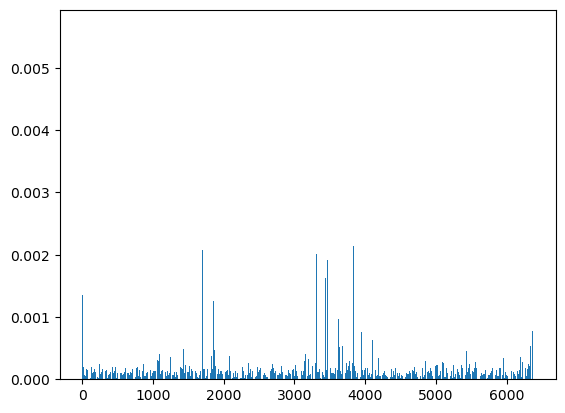

In [108]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [109]:
features = X.columns.to_list()
top_k_features = np.argsort(importance)[-50:]
tresh=importance[top_k_features[0]]
# summarize feature importance
for i,v in enumerate(importance):
    if v >= tresh:
        print('Feature: %s, Score: %.5f' % (features[i],v))

Feature: audspec_lengthL1norm_sma_quartile3, Score: 0.00135
Feature: pcm_fftMag_spectralHarmonicity_sma_iqr1-2, Score: 0.00152
Feature: mfcc_sma[5]_lpc1, Score: 0.00200
Feature: mfcc_sma[6]_lpc1, Score: 0.00208
Feature: mfcc_sma[7]_lpc0, Score: 0.00184
Feature: mfcc_sma[7]_lpc1, Score: 0.00134
Feature: mfcc_sma[8]_lpgain, Score: 0.00246
Feature: mfcc_sma[8]_lpc1, Score: 0.00190
Feature: mfcc_sma[10]_lpc1, Score: 0.00196
Feature: mfcc_sma[11]_lpgain, Score: 0.00230
Feature: mfcc_sma[12]_lpgain, Score: 0.00206
Feature: mfcc_sma[13]_lpc0, Score: 0.00132
Feature: mfcc_sma_de[3]_lpc0, Score: 0.00202
Feature: mfcc_sma_de[4]_lpc1, Score: 0.00149
Feature: mfcc_sma_de[4]_lpc3, Score: 0.00167
Feature: mfcc_sma_de[5]_lpc0, Score: 0.00193
Feature: mfcc_sma_de[5]_lpc1, Score: 0.00209
Feature: mfcc_sma_de[5]_lpc2, Score: 0.00281
Feature: mfcc_sma_de[6]_lpgain, Score: 0.00195
Feature: mfcc_sma_de[6]_lpc0, Score: 0.00247
Feature: mfcc_sma_de[6]_lpc2, Score: 0.00242
Feature: mfcc_sma_de[6]_lpc3, Score:

## Feature Selection:

In [110]:
# feature selection
def select_features(model, X_train, y_train, X_test, max_features=50):
	# configure to select a subset of features
	fs = SelectFromModel(model, max_features=max_features)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [111]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(model_rfc, X_train_scaled, y_train, X_test_scaled, 25)

__Logistic Regression:__

In [112]:
# fit the model
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train_fs, y_train)
# evaluate the model
yhat = model_lr.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 89.29


__KNN Classifier:__

In [113]:
model_knnc = KNeighborsClassifier()
model_knnc.fit(X_train_fs, y_train)

# evaluate the model
yhat = model_knnc.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 80.71


__Linear SVM:__

In [114]:
#linear SVM
model_linear_svm = svm.SVC(kernel='linear')

#fit the model 
model_linear_svm.fit(X_train_fs, y_train)

#Predict the response
yhat_svm = model_linear_svm.predict(X_test_fs)

#evaluate predictions
accuracy_svm = accuracy_score(y_test, yhat_svm)
print('Accuracy: %.2f' % (accuracy_svm*100))

Accuracy: 90.71


__Non-linear SVM:__

In [115]:
#hyperparameters
kernels = ['poly', 'rbf', 'sigmoid']
C = [1, 1.5, 2]

#hyperparameter search
for kernel in kernels:
    for c in C:
        
        #linear SVM
        model_linear_svm = svm.SVC(kernel=kernel, C=c)

        #fit the model 
        model_linear_svm.fit(X_train_fs, y_train)

        #Predict the response
        yhat_svm = model_linear_svm.predict(X_test_fs)

        #evaluate predictions
        accuracy_svm = accuracy_score(y_test, yhat_svm)
        print('Kernel: {}, C: {}'.format(kernel, c))
        print('Accuracy: %.2f\n' % (accuracy_svm*100))


Kernel: poly, C: 1
Accuracy: 78.57

Kernel: poly, C: 1.5
Accuracy: 80.71

Kernel: poly, C: 2
Accuracy: 82.86

Kernel: rbf, C: 1
Accuracy: 87.14

Kernel: rbf, C: 1.5
Accuracy: 88.57

Kernel: rbf, C: 2
Accuracy: 87.86

Kernel: sigmoid, C: 1
Accuracy: 75.71

Kernel: sigmoid, C: 1.5
Accuracy: 74.29

Kernel: sigmoid, C: 2
Accuracy: 73.57



## Visualization:

In [116]:
real_idx = np.where(y_train.to_numpy() == 0)[0]
X_real = pd.DataFrame(X_train_fs[real_idx])
fake_idx = np.where(y_train.to_numpy() == 1)[0]
X_fake = pd.DataFrame(X_train_fs[fake_idx])
len(X_real), len(X_fake)

(631, 629)

In [126]:
X_tsne = pd.concat([X_real, X_fake]).reset_index()

In [129]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random')
X_tsne_2d = tsne.fit_transform(X_tsne)

/home/ubuntu/miniconda3/envs/deepfake-detection-v1/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


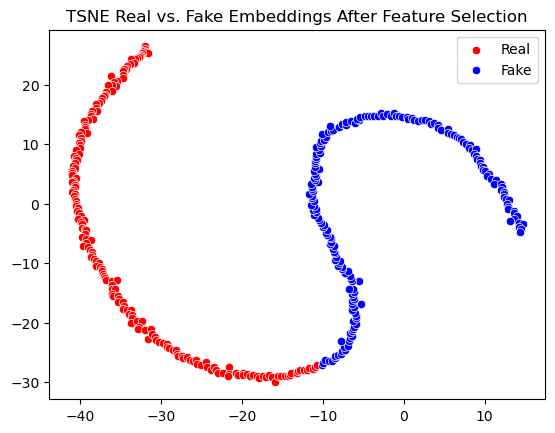

In [130]:
sns.scatterplot(x=X_tsne_2d[:195,0], y=X_tsne_2d[:195,1], color='red', label='Real')
sns.scatterplot(x=X_tsne_2d[195:384,0], y=X_tsne_2d[195:384,1], color='blue', label='Fake')
#sns.scatterplot(x=X_tsne_2d[384:,0], y=X_tsne_2d[384:,1], color='orange', label='ITW Fake')
plt.title('TSNE Real vs. Fake Embeddings After Feature Selection')
plt.show()

## Hyperparameter tuning for Logistic Regression:

In [122]:
max_features = np.arange(5,50,1)
lr_accuracies = []
knn_accuracies = []
svm_accuracies = []

In [123]:
for maxf in max_features:
    
    X_train_fs, X_test_fs, fs = select_features(model_rfc, X_train_scaled, y_train, X_test_scaled, maxf)
    
    # fit the logreg model
    model_lr = LogisticRegression(solver='liblinear')
    model_lr.fit(X_train_fs, y_train)
    # evaluate the model
    yhat_lr = model_lr.predict(X_test_fs)
    # evaluate predictions
    lr_accuracies.append(accuracy_score(y_test, yhat_lr))
    
    #KNN classifier
    model_knnc = KNeighborsClassifier()
    model_knnc.fit(X_train_fs, y_train)
    # evaluate the model
    yhat_knnc = model_knnc.predict(X_test_fs)
    # evaluate predictions
    knn_accuracies.append(accuracy_score(y_test, yhat_knnc))
    
    #SVM classifier
    #linear SVM
    model_linear_svm = svm.SVC(kernel='linear')
    #fit the model 
    model_linear_svm.fit(X_train_fs, y_train)
    #Predict the response
    yhat_svm = model_linear_svm.predict(X_test_fs)
    #evaluate predictions
    svm_accuracies.append(accuracy_score(y_test, yhat_svm))

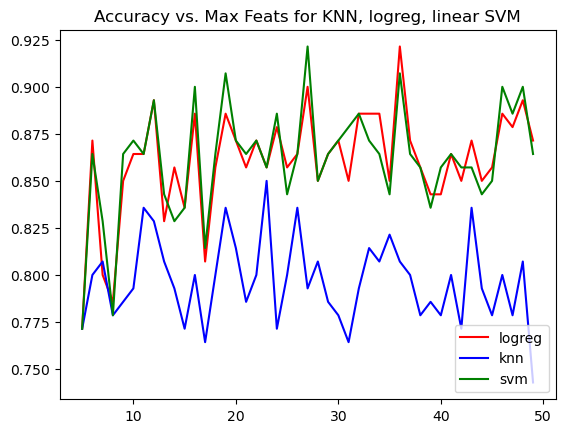

In [125]:
sns.lineplot(x=max_features, y=lr_accuracies, color='red', label='logreg')
sns.lineplot(x=max_features, y=knn_accuracies, color='blue', label='knn')
sns.lineplot(x=max_features, y=svm_accuracies, color='green', label='svm')
plt.title('Accuracy vs. Max Feats for KNN, logreg, linear SVM')
plt.show()